In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.4.1'

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [61]:
dataset = pd.read_csv("D:\\lh_data\\ineuron\\Churn_Modelling.csv")
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [62]:
X = dataset.iloc[:,3:13]
y = dataset.iloc[:,-1]

In [63]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [64]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [65]:
# Feature Engineering

geography = pd.get_dummies(X["Geography"], drop_first = True)
gender = pd.get_dummies(X["Gender"], drop_first = True)

In [66]:
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [67]:
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [68]:
X = X.drop(["Geography","Gender"], axis=1)
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [69]:
X = pd.concat([X,geography,gender], axis=1)
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [70]:
# splitting datsets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 11), (2000, 11), (8000,), (2000,))

In [71]:
# feature scaling - for ANN allows quicker convergence of GD
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)  # only transfrom to avoid data leakage
X_train[0]

array([ 1.78974378,  0.94394225,  1.04271518,  0.90982532, -0.91872163,
        0.64007158,  0.97530483, -0.56087335,  1.73436329, -0.57388614,
        0.91255717])

In [72]:
# ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

* keras became part of tensorflow after version 2.0
* numpy basic unit is arrays
* tensorflow b asic unit is a tensor

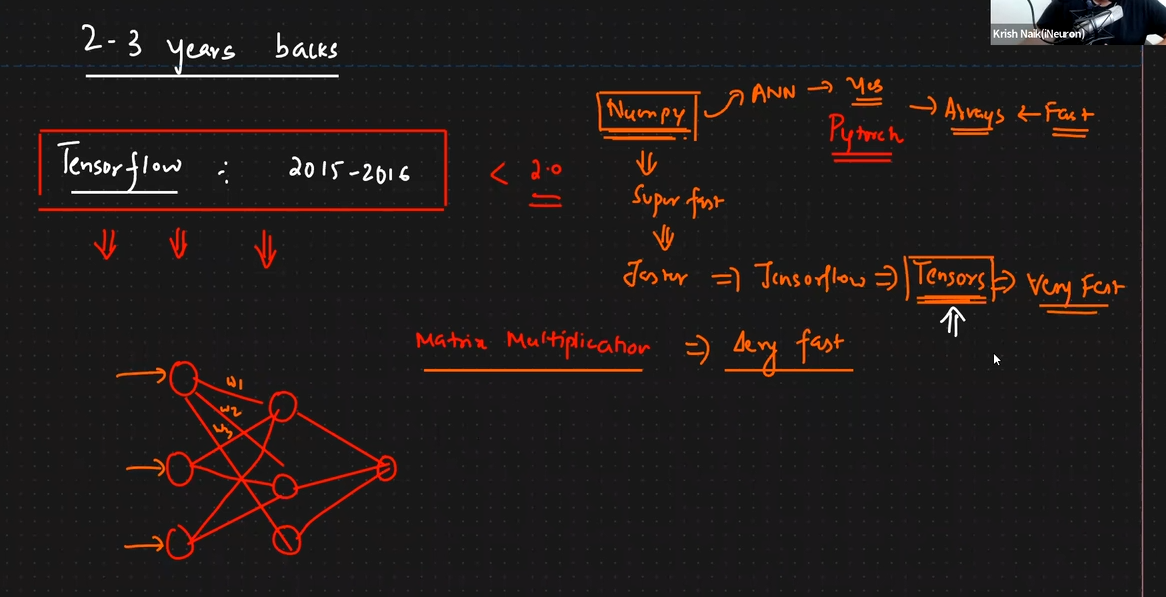

* keras is a wrapper for tensorflow, when you use keras it calls internally tensorflow
* the advantage is that keras is user friendly coding wise

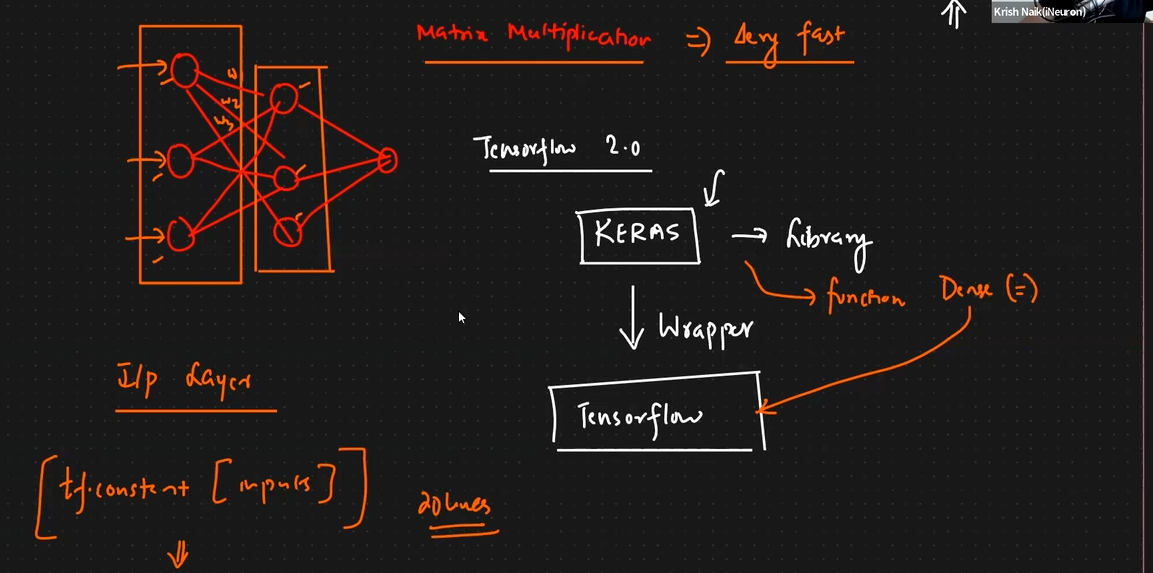


In [73]:
# initialize the ANN
classifier = Sequential()   # starts a sequential block

In [74]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(10, input_shape=(11,),activation="relu"))  # adds the input layer with 11 neurons, one for each input features 
                                                               # the first hidden layer will have 10 neurons and a rely act. function

### weight initializers - by default it uses glorot_uniform

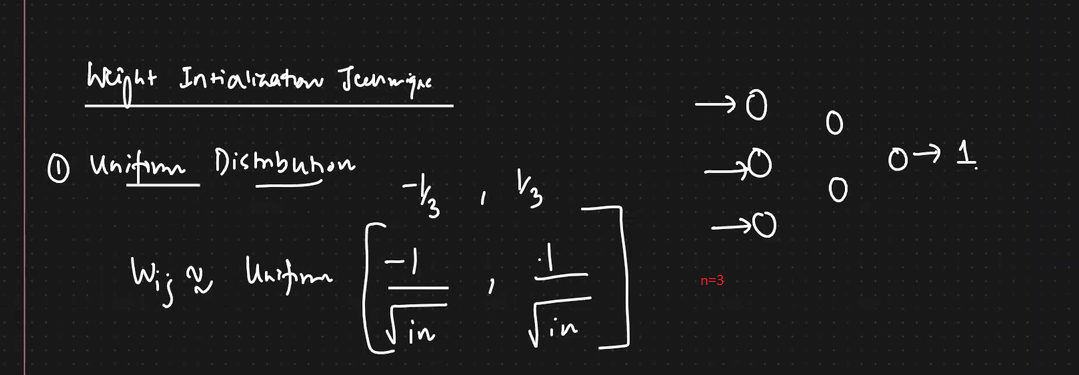

* in this case input is how many nodes in the input  (3 as the fig above)
* in this case output is how many nodes in the output (1 as the fig above)

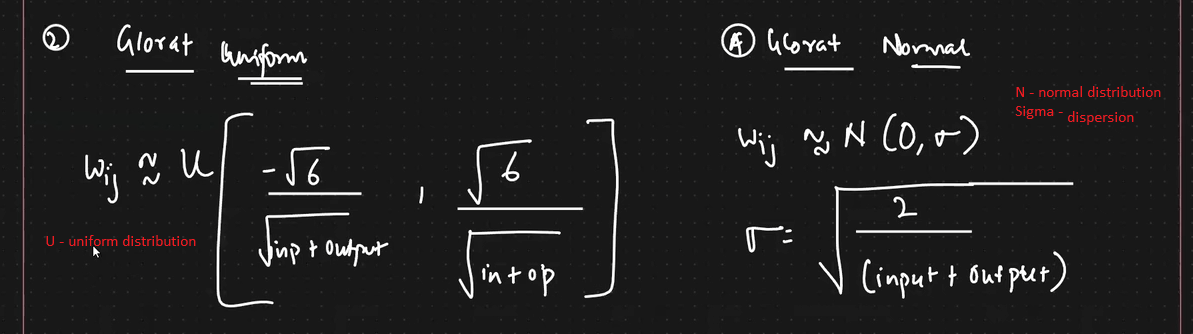

In [75]:
# Adding the second hidden layer
classifier.add(Dense(units=10, activation="relu"))

In [76]:
# Adding the third hidden layer
classifier.add(Dense(units=10, activation="relu"))

In [77]:
# adding the output layer
classifier.add(Dense(units=1, activation="sigmoid"))

In [78]:
classifier.summary()  # summary

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 10)                120       
_________________________________________________________________
dense_14 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_15 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 11        
Total params: 351
Trainable params: 351
Non-trainable params: 0
_________________________________________________________________


In [79]:
# compiling the model
classifier.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])   # optimizer, how to update the training weights

In [ ]:
# for optimizer one can also use the tensorflow one
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)   # the learning rate can be changed

# then re run the compilation using the variable used above
classifier.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

* early stopping

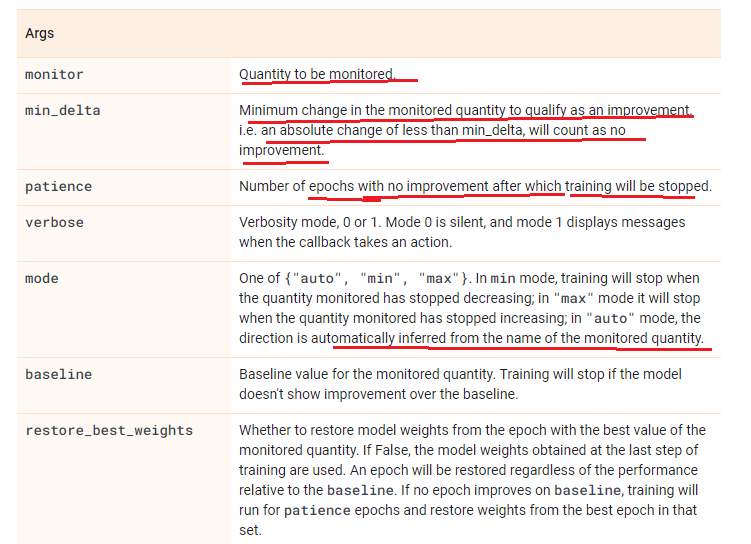

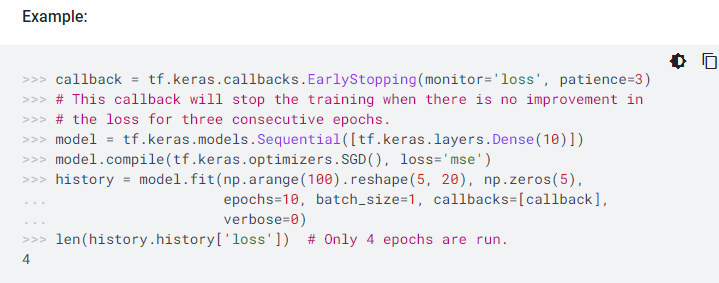

In [80]:
# early stopping
# forward and backward propagation will stop when the loss stops decreasing, for that we use early stopping.
# so even though that we did not reach the total amount of epochs , we can stop the process early
# min_delta tells us that once the loss stops reach this delta change it should stop even if there are epochs remaining
# patience tells us to wait atleast up to 20 epochs with min_delta before early stopping the calculations

import tensorflow as tf

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,                 # default value
    patience=5,
    verbose=0,                   # default value
    mode="auto",                 # default value
    baseline=None,               # default value
    restore_best_weights=False)  # default value
    

In [81]:
# forward and backward propagation only happens when using the .fit part

# input 8k records
# validation 33%  = 2640 records for validation, and 5360 records for training
# 5360 records / batch_size 10 = 536 records per batch, so each batch inputs 536 records
# you need 10 iterations each of 536 records, to finish one epoch

model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=100, callbacks = early_stopping)



Epoch 1/100
536/536 [==============================] - 2s 3ms/step - loss: 0.5246 - accuracy: 0.7795 - val_loss: 0.4355 - val_accuracy: 0.8084
Epoch 2/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4228 - accuracy: 0.8076 - val_loss: 0.4182 - val_accuracy: 0.8118
Epoch 3/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4156 - accuracy: 0.8091 - val_loss: 0.3997 - val_accuracy: 0.8251
Epoch 4/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3803 - accuracy: 0.8346 - val_loss: 0.3821 - val_accuracy: 0.8353
Epoch 5/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3778 - accuracy: 0.8394 - val_loss: 0.3667 - val_accuracy: 0.8410
Epoch 6/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3535 - accuracy: 0.8572 - val_loss: 0.3569 - val_accuracy: 0.8493
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3435 - accuracy: 0.8598 - val_loss: 0.3474 - val_accuracy: 0.8569

In [82]:
# model history variable will keep the keys below: loss/accuracy val_loss/val_accuracy

model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

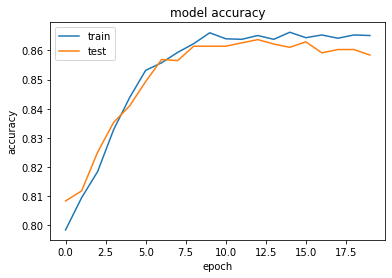

In [83]:
# summarize history for accuracy

plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train","test"], loc="upper left")
plt.show()

In [84]:
# provide your own validation dataset
# notice that since no validation split is being provided, we are using the entire training dataset 8k for training 
# number of records 8k / batch_size 10 = 800 records per iteration
model_history = classifier.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=10, epochs=100, callbacks = early_stopping)

Epoch 1/100
800/800 [==============================] - 2s 2ms/step - loss: 0.3281 - accuracy: 0.8655 - val_loss: 0.3597 - val_accuracy: 0.8520
Epoch 2/100
800/800 [==============================] - 1s 2ms/step - loss: 0.3258 - accuracy: 0.8652 - val_loss: 0.3613 - val_accuracy: 0.8520
Epoch 3/100
800/800 [==============================] - 1s 2ms/step - loss: 0.3256 - accuracy: 0.8655 - val_loss: 0.3596 - val_accuracy: 0.8540
Epoch 4/100
800/800 [==============================] - 1s 2ms/step - loss: 0.3245 - accuracy: 0.8645 - val_loss: 0.3570 - val_accuracy: 0.8535
Epoch 5/100
800/800 [==============================] - 1s 2ms/step - loss: 0.3251 - accuracy: 0.8662 - val_loss: 0.3635 - val_accuracy: 0.8510
Epoch 6/100
800/800 [==============================] - 1s 2ms/step - loss: 0.3242 - accuracy: 0.8664 - val_loss: 0.3577 - val_accuracy: 0.8515
Epoch 7/100
800/800 [==============================] - 1s 2ms/step - loss: 0.3230 - accuracy: 0.8677 - val_loss: 0.3555 - val_accuracy: 0.8540

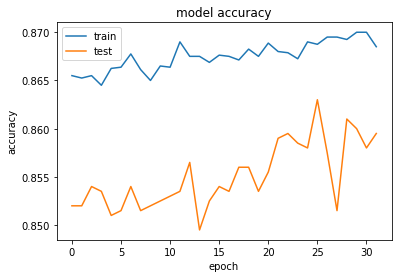

In [85]:
# summarize history for accuracy

plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train","test"], loc="upper left")
plt.show()

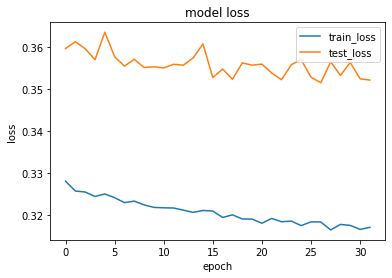

In [86]:
# summarize history for accuracy

plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train_loss","test_loss"], loc="upper right")
plt.show()

In [87]:
# making predictions and evaluation the model

y_pred = classifier.predict(X_test)
#y_pred = y_pred >=0.5
y_pred

array([[0.4285005 ],
       [0.72382927],
       [0.6710347 ],
       ...,
       [0.20610034],
       [0.20069611],
       [0.9986489 ]], dtype=float32)

In [88]:
y_pred = (y_pred >=0.5)
y_pred

array([[False],
       [ True],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

In [89]:
# make confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[1520,   58],
       [ 223,  199]], dtype=int64)

In [90]:
# calculate accuracy
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, y_pred)
score

0.8595

In [91]:
# get the weights

classifier.get_weights()

[array([[ 9.00593251e-02, -2.27118924e-01,  4.00808378e-04,
          4.19053389e-03,  5.68472408e-02, -1.60878167e-01,
          3.38562727e-02, -7.83045590e-02,  5.26197314e-01,
         -3.65353078e-02],
        [ 7.41582036e-01,  3.30253422e-01, -5.70010483e-01,
          2.14240134e-01, -3.62126231e-01,  8.89433324e-01,
         -8.74245107e-01, -1.33718058e-01,  4.97962624e-01,
         -1.40421614e-01],
        [-1.43512279e-01, -1.07673086e-01, -3.30269188e-02,
          7.26052225e-02, -2.08182946e-01,  3.52752879e-02,
         -1.64597079e-01, -8.48816931e-02, -2.52418697e-01,
         -1.52419150e-01],
        [-2.33272120e-01,  8.87258589e-01,  4.52791274e-01,
          4.40522969e-01,  3.59211341e-02,  1.39783591e-01,
          8.61510217e-01,  5.25776669e-02, -7.30290711e-02,
         -4.30239409e-01],
        [-9.16885614e-01,  6.95425332e-01, -2.42194280e-01,
          5.85329533e-01,  9.78730500e-01,  3.14382404e-01,
          5.43362617e-01,  3.28589469e-01, -3.633083

In [93]:
# save the model in a h5 file
classifier.save("model.h5")  
classifier.save_weights("model_weights.h5")  

In [95]:
# loadding an h5 file
from tensorflow import keras
classifier_load = keras.models.load_model("model.h5")
classifier_load

In [96]:
y_pred_load = classifier_load.predict(X_test)

In [97]:
y_pred

array([[False],
       [ True],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

In [98]:
y_pred_load = (y_pred_load >=0.5)
y_pred_load

array([[False],
       [ True],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

# LINEAR REGRESSION - REGRESSION

In [99]:
dataset2 = pd.read_csv("D:\\lh_data\\ineuron\\Churn_Modelling.csv")
dataset2

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [106]:
features = [i for i in dataset2.columns if i not in "EstimatedSalary"]
features

['RowNumber',
 'CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'Exited']

In [113]:
X = dataset2[features]
X = X.iloc[:,3:]
y = dataset2.iloc[:,12]

In [114]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,619,France,Female,42,2,0.00,1,1,1,1
1,608,Spain,Female,41,1,83807.86,1,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,1
3,699,France,Female,39,1,0.00,2,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,0
9996,516,France,Male,35,10,57369.61,1,1,1,0
9997,709,France,Female,36,7,0.00,1,0,1,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,1


In [115]:
y

0       101348.88
1       112542.58
2       113931.57
3        93826.63
4        79084.10
          ...    
9995     96270.64
9996    101699.77
9997     42085.58
9998     92888.52
9999     38190.78
Name: EstimatedSalary, Length: 10000, dtype: float64

In [116]:
# Feature Engineering

geography = pd.get_dummies(X["Geography"], drop_first = True)
gender = pd.get_dummies(X["Gender"], drop_first = True)
X = X.drop(["Geography","Gender"], axis=1)
X = pd.concat([X,geography,gender], axis=1)
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,1,0,0,0
1,608,41,1,83807.86,1,0,1,0,0,1,0
2,502,42,8,159660.80,3,1,0,1,0,0,0
3,699,39,1,0.00,2,0,0,0,0,0,0
4,850,43,2,125510.82,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,0,0,0,1
9996,516,35,10,57369.61,1,1,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,1,0,0,0
9998,772,42,3,75075.31,2,1,0,1,1,0,1


In [117]:
# splitting datsets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 11), (2000, 11), (8000,), (2000,))

In [118]:
# feature scaling - for ANN allows quicker convergence of GD
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)  # only transfrom to avoid data leakage
X_train[0]

array([ 1.78974378,  0.94394225,  1.04271518,  0.90982532, -0.91872163,
        0.64007158,  0.97530483, -0.502928  ,  1.73436329, -0.57388614,
        0.91255717])

In [119]:
# initialize the ANN
regressor = Sequential()   # starts a sequential block
regressor.add(Dense(10, input_shape=(11,),activation="relu"))   # adding input and 1st hiddent layer
regressor.add(Dense(units=10, activation="relu"))  # adding 2nd hidden layer
regressor.add(Dense(units=10, activation="relu"))  # adding 3rd hidden layer
regressor.add(Dense(units=1, activation="linear")) # adding the output layer, solving a regression problem now


In [120]:
regressor.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 10)                120       
_________________________________________________________________
dense_18 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_19 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 11        
Total params: 351
Trainable params: 351
Non-trainable params: 0
_________________________________________________________________


In [121]:
import tensorflow

mse = tensorflow.keras.losses.MeanSquaredError(name = "mean_squared_error")
metrics = tensorflow.keras.metrics.MeanSquaredError(name = "mean_squared_error", dtype=None)

In [134]:
# compiling the model
#regressor.compile(optimizer="adam", loss=mse, metrics=[metrics])   # optimizer, how to update the training weights

regressor.compile(optimizer="adam", loss="mse", metrics=["mae","mse"])   # optimizer, how to update the training weights

In [137]:
early_stopping = tensorflow.keras.callbacks.EarlyStopping(
    monitor="val_mse", # available metrics: loss, mae, mse, val_loss, val_mae, val_mse    
    min_delta=0,                 # default value
    patience=5,
    verbose=0,                   # default value
    mode="auto",                 # default value
    baseline=None,               # default value
    restore_best_weights=False)  # default value

In [138]:
model_history = regressor.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size=10, epochs=100, callbacks = early_stopping)


Epoch 1/100
800/800 [==============================] - 1s 1ms/step - loss: 3281452800.0000 - mae: 49416.9258 - mse: 3281452800.0000 - val_loss: 3359780608.0000 - val_mae: 49987.7188 - val_mse: 3359780608.0000
Epoch 2/100
800/800 [==============================] - 1s 1ms/step - loss: 3280570368.0000 - mae: 49392.0781 - mse: 3280570368.0000 - val_loss: 3359727616.0000 - val_mae: 49983.3203 - val_mse: 3359727616.0000
Epoch 3/100
800/800 [==============================] - 1s 1ms/step - loss: 3280667392.0000 - mae: 49393.4609 - mse: 3280667392.0000 - val_loss: 3360729600.0000 - val_mae: 49977.8320 - val_mse: 3360729600.0000
Epoch 4/100
800/800 [==============================] - 1s 1ms/step - loss: 3280471808.0000 - mae: 49406.2266 - mse: 3280471808.0000 - val_loss: 3360531200.0000 - val_mae: 49980.3594 - val_mse: 3360531200.0000
Epoch 5/100
800/800 [==============================] - 1s 1ms/step - loss: 3280573952.0000 - mae: 49395.9727 - mse: 3280573952.0000 - val_loss: 3361291776.0000 - va

In [139]:
model_history.history.keys()

dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])

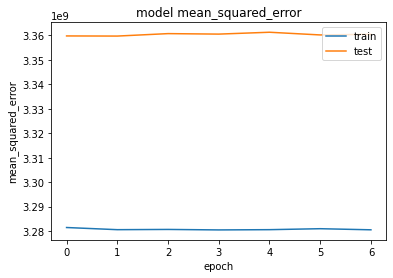

In [141]:
# summarize history for accuracy

plt.plot(model_history.history["mse"])
plt.plot(model_history.history["val_mse"])
plt.title("model mean_squared_error")
plt.ylabel("mean_squared_error")
plt.xlabel("epoch")
plt.legend(["train","test"], loc="upper right")
plt.show()

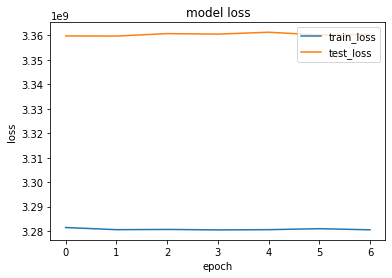

In [142]:
# summarize history for accuracy

plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train_loss","test_loss"], loc="upper right")
plt.show()

In [143]:
y_pred = regressor.predict(X_test)

In [144]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

-0.013871711216254967


# Model overfitting - Regularization
* a percentage of the neurons are dropped out randomly for each epoch in order to reduce overfitting
* usually 20-30% is used

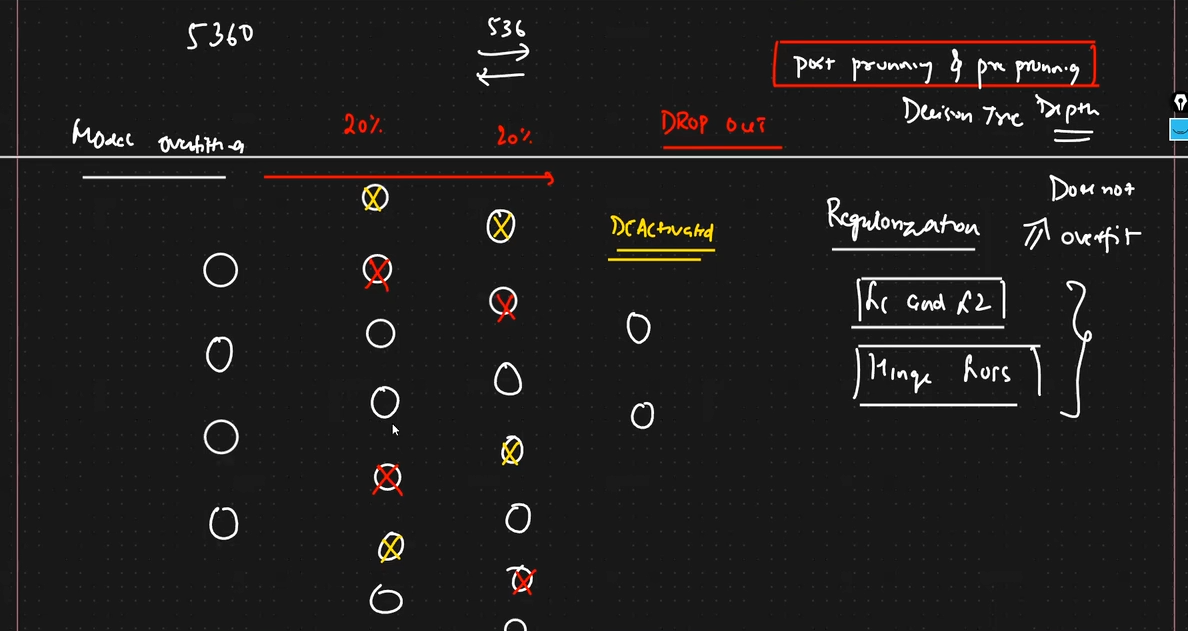

In [145]:
# initialize the ANN
classifier2 = Sequential()   # starts a sequential block
classifier2.add(Dense(10, input_shape=(11,),activation="relu"))  # adds the input layer with 11 neurons, one for each input features                                                                
classifier2.add(Dropout(0.2))                            # drops 20% of the nodes from the current hidden layer
classifier2.add(Dense(units=10, activation="relu"))
classifier2.add(Dropout(0.2))                            # drops 20% of the nodes from the current hidden layer
classifier2.add(Dense(units=10, activation="relu"))
classifier2.add(Dropout(0.2))                            # drops 20% of the nodes from the current hidden layer
classifier2.add(Dense(units=1, activation="sigmoid"))
classifier2.summary()  # summary

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 10)                120       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 10)                110       
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 10)                110       
_________________________________________________________________
dropout_3 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 1)                

### homework
https://www.tensorflow.org/tutorials/keras/keras_tuner    study the parametrization of tensorflow

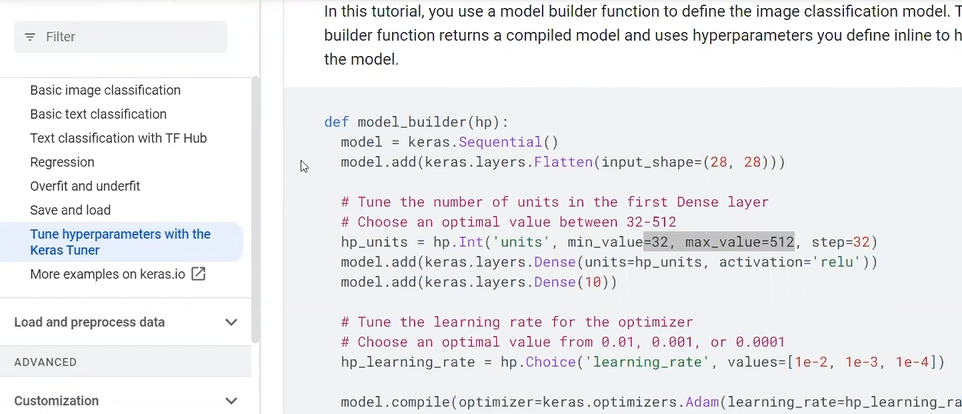

### predict fuel efficiency

https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/regression.ipynb#scrollTo=c26juK7ZG8j-